In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [14]:
n_data = data.dropna()
n_data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


[Text(0, 0, 'normal'), Text(1, 0, 'suspect'), Text(2, 0, 'pathological')]

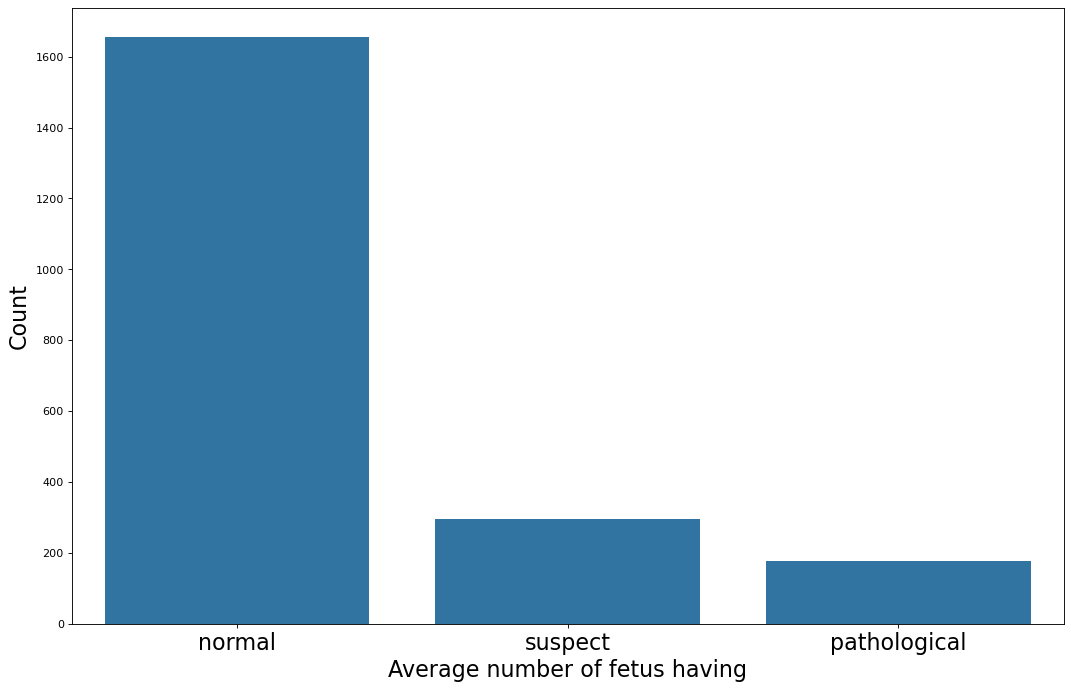

In [44]:
groups = n_data
group_data = groups['fetal_health'].value_counts().sort_index()

labels = {1.0: 'normal', 2.0: 'suspect', 3.0: 'pathological'}
group_data.index = group_data.index.map(labels)

fig, ax = plt.subplots(figsize=(16,10), dpi=80)
sns.barplot(x=group_data.index, y=group_data.values, ax=ax)
ax.set_xlabel('Average number of fetus having', size=20)
ax.set_ylabel('Count', size=20)
ax.set_xticks(ticks=range(len(group_data)))
ax.set_xticklabels(labels=group_data.index, size=20)

[Text(0, 0, 'normal'), Text(1, 0, 'suspect'), Text(2, 0, 'pathological')]

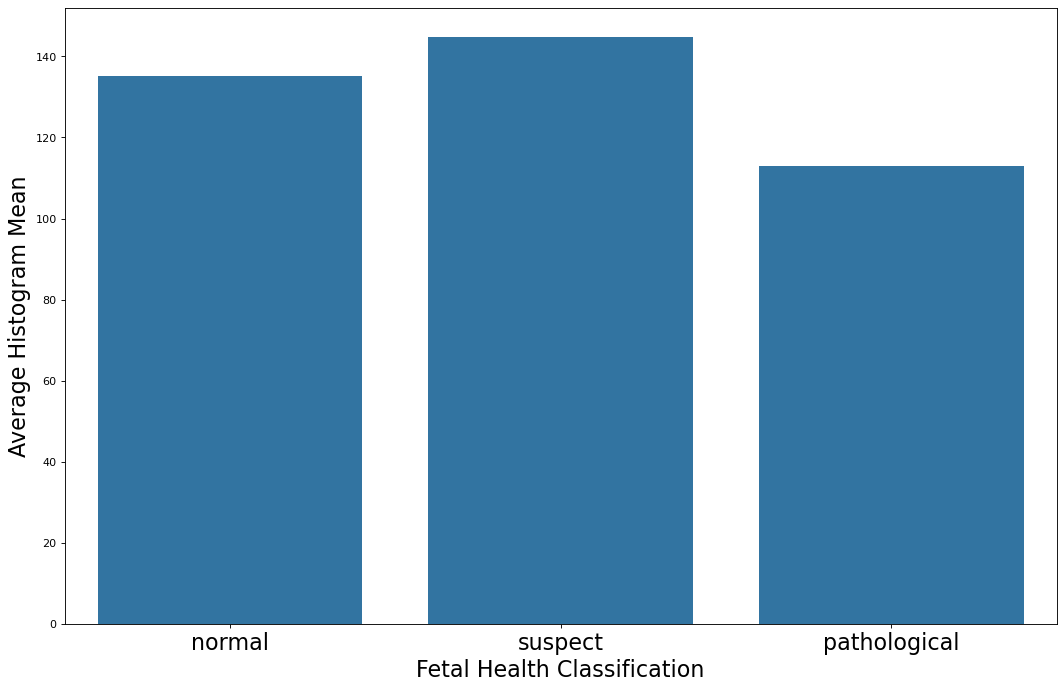

In [45]:
groups = n_data
group_data = groups.groupby('fetal_health')['histogram_mean'].mean()
group_data = group_data.sort_index()

labels = {1.0: 'normal', 2.0: 'suspect', 3.0: 'pathological'}
group_data.index = group_data.index.map(labels)

fig, ax = plt.subplots(figsize=(16,10), dpi=80)
sns.barplot(x=group_data.index, y=group_data.values, ax=ax)
ax.set_xlabel('Fetal Health Classification', size=20)
ax.set_ylabel('Average Histogram Mean', size=20)
ax.set_xticks(ticks=range(len(group_data)))
ax.set_xticklabels(labels=group_data.index, size=20)

[Text(0, 0, 'normal'), Text(1, 0, 'suspect'), Text(2, 0, 'pathological')]

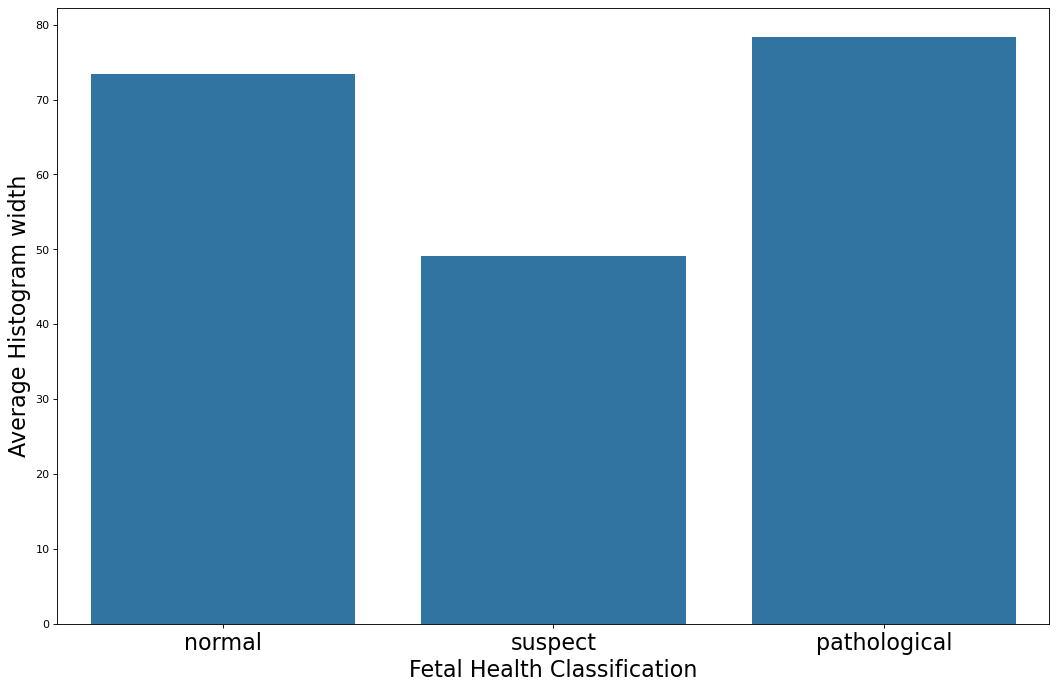

In [46]:
groups = n_data
group_data = groups.groupby('fetal_health')['histogram_width'].mean()
group_data = group_data.sort_index()

labels = {1.0: 'normal', 2.0: 'suspect', 3.0: 'pathological'}
group_data.index = group_data.index.map(labels)

fig, ax = plt.subplots(figsize=(16,10), dpi=80)
sns.barplot(x=group_data.index, y=group_data.values, ax=ax)
ax.set_xlabel('Fetal Health Classification', size=20)
ax.set_ylabel('Average Histogram width', size=20)
ax.set_xticks(ticks=range(len(group_data)))
ax.set_xticklabels(labels=group_data.index, size=20)

In [16]:
x = n_data.drop(columns=['fetal_health'])
y = n_data['fetal_health']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dcs = DecisionTreeClassifier()
dcs.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
)

prediction = dcs.predict(x_test)
accuracy = accuracy_score(prediction, y_test)
precision = precision_score(prediction, y_test, average='micro')

print(f"Accuracy: {accuracy * 100}\nPrecision: {precision * 100}")


Accuracy: 92.85714285714286
Precision: 92.85714285714286
